# DCT2 open vs DCT

In [2]:
from scipy.fftpack import fft, dct
import numpy as np
import random

## Check che tutto funziona correttamente

In [3]:
d = np.array(dct(np.array([231, 32, 233, 161, 24, 71, 140, 245]), norm = "ortho"))
print(["%E" % ele for ele in d.flat])

['4.019902E+02', '6.600020E+00', '1.091674E+02', '-1.127856E+02', '6.540738E+01', '1.218314E+02', '1.166565E+02', '2.880041E+01']


In [15]:
m = np.array(
    [
        [231, 32, 233, 161, 24, 71, 140, 245],
        [247, 40, 248, 245, 124, 204, 36, 107],
        [234, 202, 245, 167, 9, 217, 239, 173],
        [193, 190, 100, 167, 43, 180, 8, 70],
        [11, 24, 210, 177, 81, 243, 8, 112],
        [97, 195, 203, 47, 125, 114, 165, 181],
        [193, 70, 174, 167, 41, 30, 127, 245],
        [87, 149, 57, 192, 65, 129, 178, 228]
    ]
)
print(dct(dct(m.T, norm="ortho").T, norm="ortho"))
dct2_homemade(m)

[[ 1.11875000e+03  4.40221926e+01  7.59190503e+01 -1.38572411e+02
   3.50000000e+00  1.22078055e+02  1.95043868e+02 -1.01604906e+02]
 [ 7.71900790e+01  1.14868206e+02 -2.18014421e+01  4.13641351e+01
   8.77720598e+00  9.90829620e+01  1.38171516e+02  1.09092795e+01]
 [ 4.48351537e+01 -6.27524464e+01  1.11614114e+02 -7.63789658e+01
   1.24422160e+02  9.55984194e+01 -3.98287969e+01  5.85237670e+01]
 [-6.99836647e+01 -4.02408945e+01 -2.34970508e+01 -7.67320594e+01
   2.66457750e+01 -3.68328290e+01  6.61891485e+01  1.25429731e+02]
 [-1.09000000e+02 -4.33430857e+01 -5.55436908e+01  8.17347083e+00
   3.02500000e+01 -2.86602437e+01  2.44149822e+00 -9.41437025e+01]
 [-5.38783591e+00  5.66345009e+01  1.73021519e+02 -3.54234494e+01
   3.23878249e+01  3.34576728e+01 -5.81167864e+01  1.90225615e+01]
 [ 7.88439693e+01 -6.45924096e+01  1.18671203e+02 -1.50904840e+01
  -1.37316928e+02 -3.06196663e+01 -1.05114114e+02  3.98130497e+01]
 [ 1.97882438e+01 -7.81813409e+01  9.72311860e-01 -7.23464180e+01
  -

array([[1117,   43,   75, -137,    3,  121,  195, -101],
       [  77,  114,  -21,   41,    8,   98,  137,   11],
       [  44,  -62,  111,  -76,  124,   95,  -39,   58],
       [ -70,  -40,  -23,  -76,   26,  -36,   65,  124],
       [-108,  -43,  -55,    7,   30,  -28,    1,  -93],
       [  -5,   56,  172,  -35,   32,   33,  -57,   18],
       [  78,  -64,  118,  -14, -136,  -29, -105,   39],
       [  19,  -77,    0,  -72,  -21,   80,   63,    6]])

Ok

## Codice

In [5]:

# calcola la matrice di ordine N
# rappresentante la trassf. DCT (O(N^2))
def compute_D(N):
    alpha_vect = np.zeros(N)
    alpha_vect[0] = pow(N, -0.5)
    alpha_vect[1:N] = pow(N, -0.5)*np.sqrt(2)
    D = np.array([np.zeros(N) for i in range(0, N)])
    
    for r in range(0, N):
        for c in range(0, N):
            D[r, c] = alpha_vect[r]*np.cos((r)*np.pi*(2*c+1)/(2*N))
    return D


# riceve in input f_vect e calcola la DCT dello stesso usando compute_D
def dct_homemade(f_vect):
    N = np.array(f_vect).size 
    D = compute_D(N)
    c_vect = np.dot(D, f_vect) 
    return c_vect

# implementazione della DCT2 (O(N^3))
def dct2_homemade(f_mat):
    N = np.array(f_mat).shape[0]
    D = compute_D(N) 
    c_mat = f_mat
    for j in range(N):
        c_mat[:, j] = np.dot(D, c_mat[:, j])
    for i in range(N):
        c_mat[i, :] = np.dot(D, c_mat[i, :])
    return c_mat

In [6]:
### Creazione matrici

def checkboard_matrix(n):
    m = np.zeros((n, n))
    odd_rows = n // 2
    even_rows = int(np.ceil(n / 2))
    m[1::2, ::2] = [[random.random() * 100 for j in range(even_rows)] for i in range(odd_rows)]
    m[::2, 1::2] = [[random.random() * 100 for j in range(odd_rows)] for i in range(even_rows)] 
    return m
    
def diagonally_dominant_matrix(n): 
    m = np.identity(n) * 3
    for i in range(1, n): 
        m[i, i-1] = 1 
        m[i-1, i] = 1
    return m

def incrementally_matrix(n): 
    m = np.zeros((n, n))
    for i in range(0,n):
        for j in range(0, n): m[i, j] = i+j
    return m

In [7]:
incrementally_matrix(4)

array([[0., 1., 2., 3.],
       [1., 2., 3., 4.],
       [2., 3., 4., 5.],
       [3., 4., 5., 6.]])

## SpeedTest

In [22]:
from tqdm import tqdm
import time

times_my = []
times_dct = []

for dim in tqdm(range(1000, 10500, 500)):
    m = checkboard_matrix(dim)
    start = time.time()
    dct(dct(m.T, norm="ortho").T, norm="ortho")
    end_dct = time.time() - start
    times_dct.append(end_dct)

    start = time.time()
    dct2_homemade(m)
    end_my = time.time() - start
    times_my.append(end_my)

file = open("results.txt", "a")
file.write(f'\n\n{str(times_my)}\n{str(times_dct)}')
file.close()


100%|██████████| 19/19 [57:08<00:00, 180.46s/it]


In [24]:
from tqdm import tqdm
import time

times_my = []
times_dct = []

for dim in tqdm(range(1000, 10500, 500)):
    m = diagonally_dominant_matrix(dim)
    start = time.time()
    dct(dct(m.T, norm="ortho").T, norm="ortho")
    end_dct = time.time() - start
    times_dct.append(end_dct)

    start = time.time()
    dct2_homemade(m)
    end_my = time.time() - start
    times_my.append(end_my)

file = open("results_dom.txt", "a")
file.write(f'\n\n{str(times_my)}\n{str(times_dct)}')
file.close()


100%|██████████| 19/19 [56:00<00:00, 176.89s/it]


In [25]:
from tqdm import tqdm
import time

times_my = []
times_dct = []

for dim in tqdm(range(1000, 10500, 500)):
    m = incrementally_matrix(dim)
    start = time.time()
    dct(dct(m.T, norm="ortho").T, norm="ortho")
    end_dct = time.time() - start
    times_dct.append(end_dct)

    start = time.time()
    dct2_homemade(m)
    end_my = time.time() - start
    times_my.append(end_my)

file = open("results_incr.txt", "a")
file.write(f'\n\n{str(times_my)}\n{str(times_dct)}')
file.close()


100%|██████████| 19/19 [1:12:44<00:00, 229.73s/it]


### Grafiketti

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
color = ['#74BDCB', '#FFA384', '#B99095', '#3D5B59']

#### Checkboard

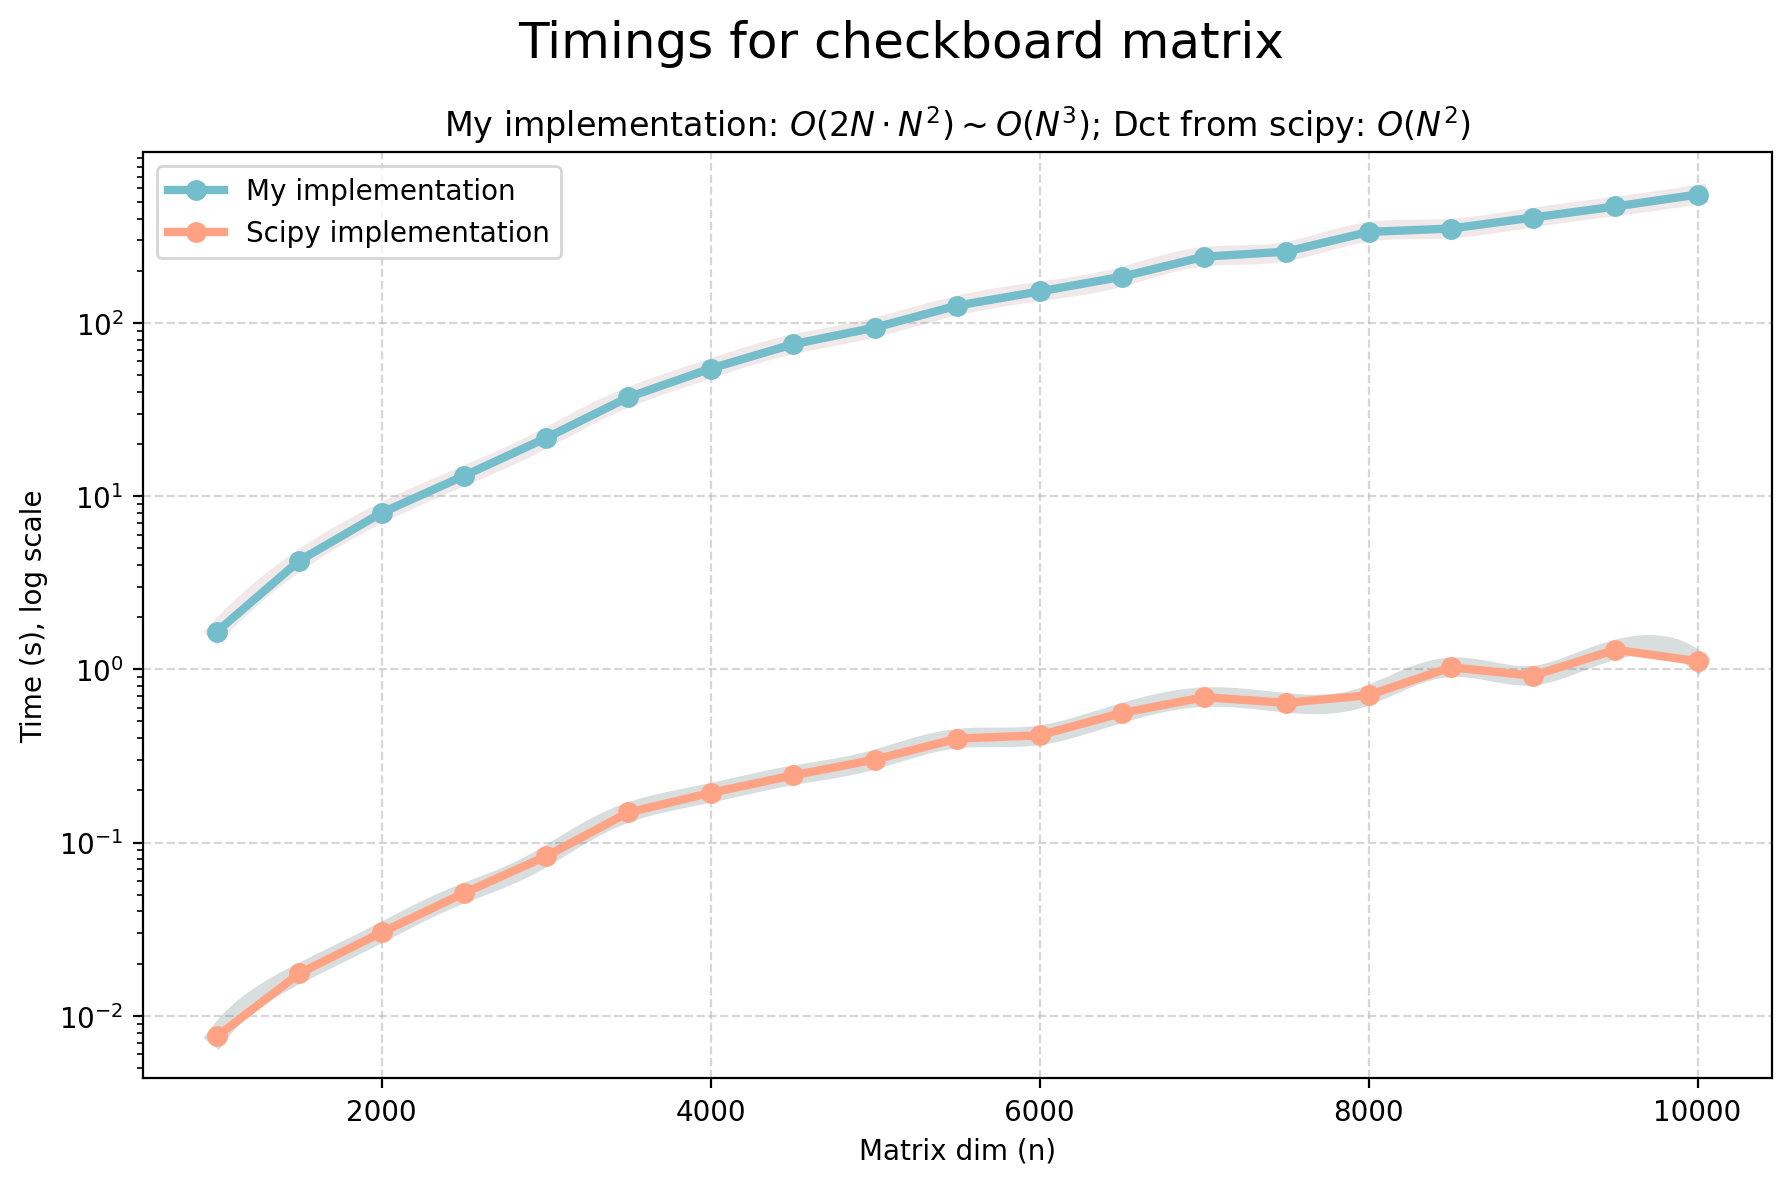

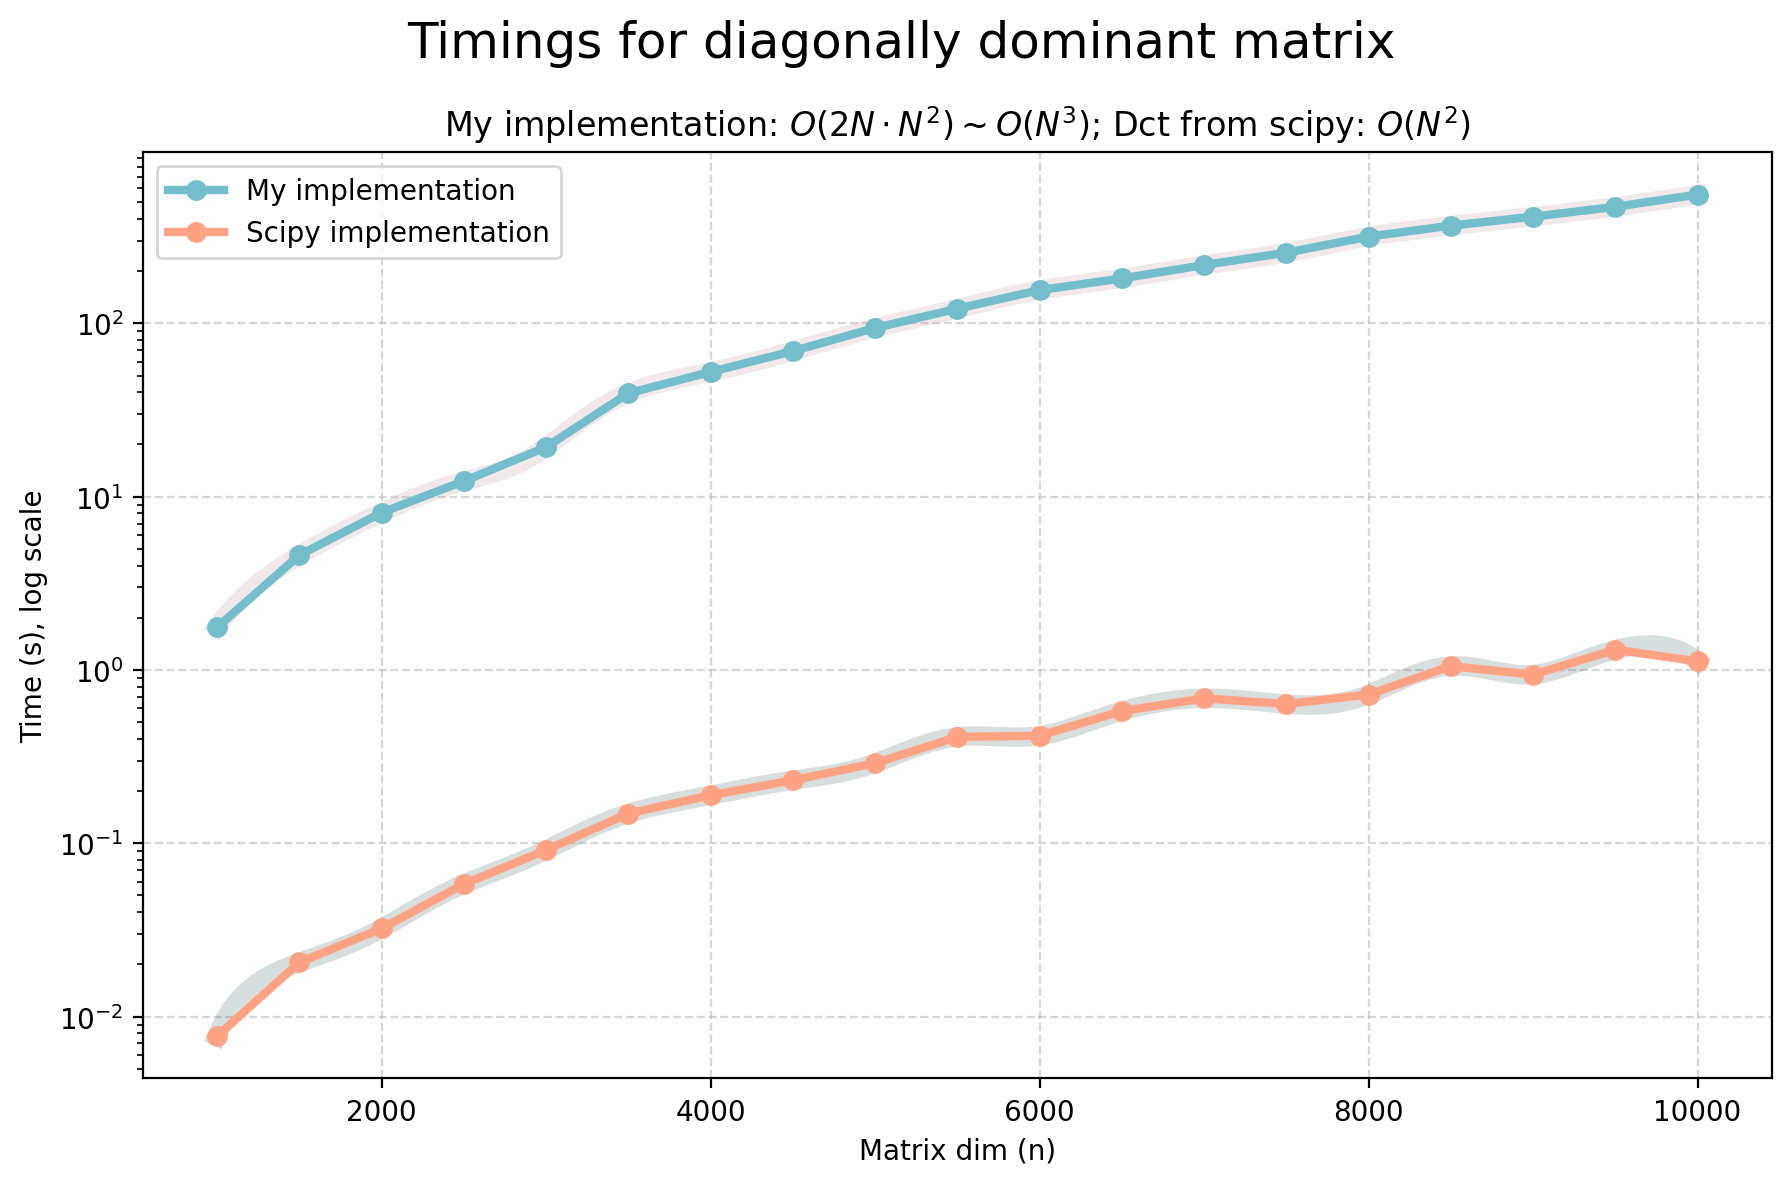

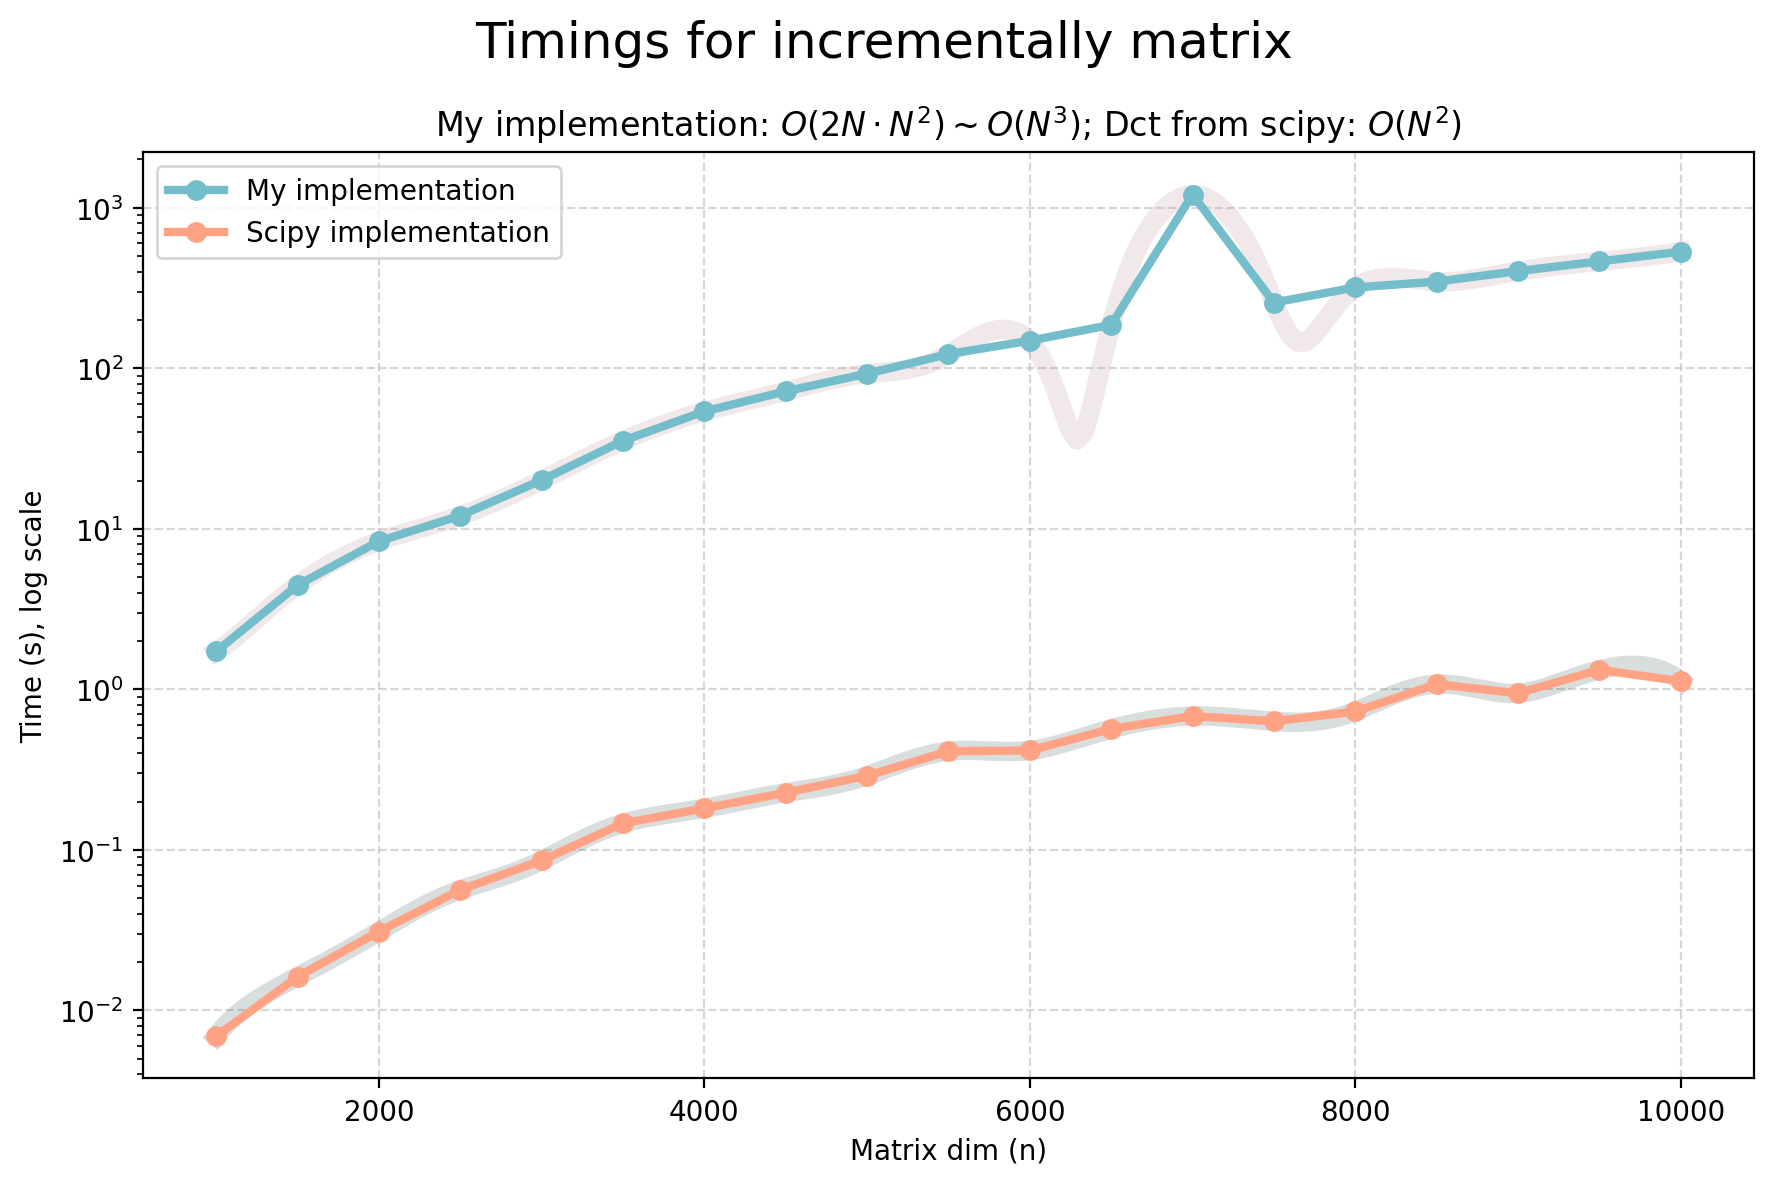

In [135]:
from scipy.interpolate import make_interp_spline
from scipy.interpolate import interp1d

# leggo solo le ultime due righe
for file in ['results/results_checkboard.txt', 'results/results_diagonally dominant.txt', 'results/results_incrementally.txt']:
    
    with open(file) as f:
        lines = f.readlines()
    lines = lines[-2:]
    dct_times = list(map(float, lines[-1].replace("\n","")[1:-1].split(', ')))
    my_times = list(map(float, lines[-2].replace("\n","")[1:-1].split(', ')))

    fig, ax = plt.subplots(figsize = (9, 6), dpi = 200)

    ####
    # 300 represents number of points to make between T.min and T.max
    
    x = list(range(1000, 10500, 500))
    cubic_interploation_model_my = interp1d(x, my_times, kind = "cubic")
    cubic_interploation_model_sci = interp1d(x, dct_times, kind = "cubic")

    X_ = np.linspace(np.min(x), np.max(x), 200)
    Y_my = cubic_interploation_model_my(X_)
    Y_dct = cubic_interploation_model_sci(X_)
    
    plt.plot(X_, Y_my, linewidth = 7, color = color[2], alpha = 0.2)
    plt.plot(X_, Y_dct, linewidth = 7, color = color[3], alpha = 0.2)
    
    ####
    
    plt.plot(x, my_times, label = 'My implementation', color = color[0], marker = '.', markersize = 13, linewidth = 3)
    plt.plot(x, dct_times, label = 'Scipy implementation', color = color[1], marker = '.', markersize = 13, linewidth = 3)



    plt.ylabel('Time (s), log scale')
    plt.xlabel('Matrix dim (n)')
    plt.suptitle(f"Timings for {file.split('/')[1].split('.')[0].split('_')[1]} matrix", fontsize = 18)
    plt.title(r'My implementation: $O(2N \cdot N^2) \sim  O(N^3)$; Dct from scipy: $O(N^2)$')

    #ax.set_xticks(np.arange(0, len(my_times)), labels = list(range(1000, 10500, 500)))
    # ax.set_xticklabels(list(range(1000, 10500, 500)))

    ax.grid(linestyle='--', alpha = 0.5)
    ax.set_axisbelow(True)
    ax.legend()
    plt.tight_layout()
    ax.set_yscale('log')
    plt.show()


## Parte 2